## Plots of genome alignment using 3 mthods

Plots after seperate alignment using 

* Seal: Simulataneous kmer matching to human, Malayan pangolin and African green monkey genomes using Seal

* ConcatRef: Alignment to concatenated human, Malayan pangolin and African green monkey genomes using minimap2. Best alignment statistics calculated using 

* Disambiguate: bwa-mem to human, Malayan pangolin and African green monkey genomes, then best mapping caculated using cvbio Disambiguate

Plots for both read and contig (300-nt minimum length) alignments


In [1]:
import re
import numpy as np
import time
import os.path
import sys
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from io import StringIO
from Bio import SeqIO
import pysam
from pandas.plotting import scatter_matrix
import warnings
import json
import numpy as np
import subprocess
warnings.filterwarnings('ignore')


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
BASE_PATH='/mnt/8TB_2/Data/Assembly/PRJCA002517/'

In [7]:
tripple_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_methods_human_vero_manjav_no_ambig_bwamem_stats_df.csv')

In [8]:
tripple_df.head()

,SRA,Sample,M.javanica %,H.sapiens %,C.sabaeus %,Method
0,CRR477154,A96,87.077931,7.398182,5.523888,Disambiguate
1,CRR477155,A97,64.216343,19.715196,16.068461,Disambiguate
2,CRR477156,A98,96.307039,2.104971,1.587990,Disambiguate
3,CRR477157,A100,33.999105,35.179072,30.821823,Disambiguate
4,CRR477154,A96,98.668426,0.039169,1.292405,ConcatRef


In [9]:
m_concat=tripple_df.loc[tripple_df['Method'] == 'ConcatRef']
m_seal=tripple_df.loc[tripple_df['Method'] == 'Seal']
m_Disambiguate=tripple_df.loc[tripple_df['Method'] == 'Disambiguate']

In [10]:
MARKER_SIZE=10
MARKER_ALPHA=0.6

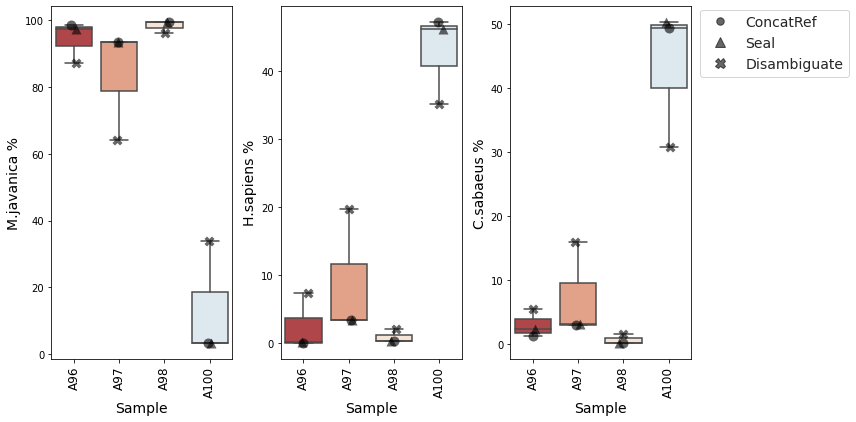

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

sns.set_palette("RdBu")
sns.set_style("whitegrid")

sns.boxplot(data=tripple_df, x='Sample', y='M.javanica %', ax=ax1)
chart=sns.stripplot(data=m_concat, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=m_seal, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, marker="^", ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=m_Disambiguate, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, marker="X", ax=ax1, s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('M.javanica %', fontdict={'size': 14})
labels1=ax1.get_xticklabels()
ax1.set_xticklabels(labels1, rotation=90, fontsize=12)
#ax1.set_yscale('log')

sns.boxplot(data=tripple_df, x='Sample', y='H.sapiens %', ax=ax2)
chart=sns.stripplot(data=m_concat, x='Sample', y='H.sapiens %', color="k", alpha=MARKER_ALPHA, ax=ax2, s=MARKER_SIZE)
chart=sns.stripplot(data=m_seal, x='Sample', y='H.sapiens %', color="k", alpha=MARKER_ALPHA, marker="^", ax=ax2, s=MARKER_SIZE)
chart=sns.stripplot(data=m_Disambiguate, x='Sample', y='H.sapiens %', color="k", alpha=MARKER_ALPHA, marker="X", ax=ax2, s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('H.sapiens %', fontdict={'size': 14})
labels2=ax2.get_xticklabels()
ax2.set_xticklabels(labels2, rotation=90, fontsize=12)

sns.boxplot(data=tripple_df, x='Sample', y='C.sabaeus %', ax=ax3)
chart=sns.stripplot(data=m_concat, x='Sample', y='C.sabaeus %', color="k", alpha=MARKER_ALPHA, ax=ax3, s=MARKER_SIZE)
chart=sns.stripplot(data=m_seal, x='Sample', y='C.sabaeus %', color="k", alpha=MARKER_ALPHA, marker="^", ax=ax3, s=MARKER_SIZE)
chart=sns.stripplot(data=m_Disambiguate, x='Sample', y='C.sabaeus %', color="k", alpha=MARKER_ALPHA, marker="X", ax=ax3, s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('C.sabaeus %', fontdict={'size': 14})
labels3=ax3.get_xticklabels()
ax3.set_xticklabels(labels3, rotation=90, fontsize=12)


plt_labels=['ConcatRef', 'Seal', 'Disambiguate']
handles, labels = ax3.get_legend_handles_labels()
dot = mlines.Line2D([], [], color='k', marker='.',
                          markersize=15, label='ConcatRef', alpha=MARKER_ALPHA, linewidth=0.001)
tri = mlines.Line2D([], [], color='k', marker='^',
                          markersize=10, label='Seal', alpha=MARKER_ALPHA, linewidth=0.001)
cross = mlines.Line2D([], [], color='k', marker='X',
                          markersize=10, label='Disambiguate', alpha=MARKER_ALPHA, linewidth=0.001)
ax3.legend(handles=[dot, tri, cross], loc=(1.05, 0.8), fontsize=14)


#plt.legend()
plt.tight_layout()
plt.savefig(BASE_PATH+'/general_plots/3_method_host_box_combined_v2.png', dpi=300)
plt.show()

## Contigs

In [12]:
contigs_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_methods_human_vero_manjav_no_ambig_bwamem_contig_stats_df.csv')

In [13]:
tripple_df=None

In [15]:
m_concat=contigs_df.loc[contigs_df['Method'] == 'ConcatRef']
m_seal=contigs_df.loc[contigs_df['Method'] == 'Seal']
m_Disambiguate=contigs_df.loc[contigs_df['Method'] == 'Disambiguate']

In [16]:
MARKER_SIZE=10
MARKER_ALPHA=0.6

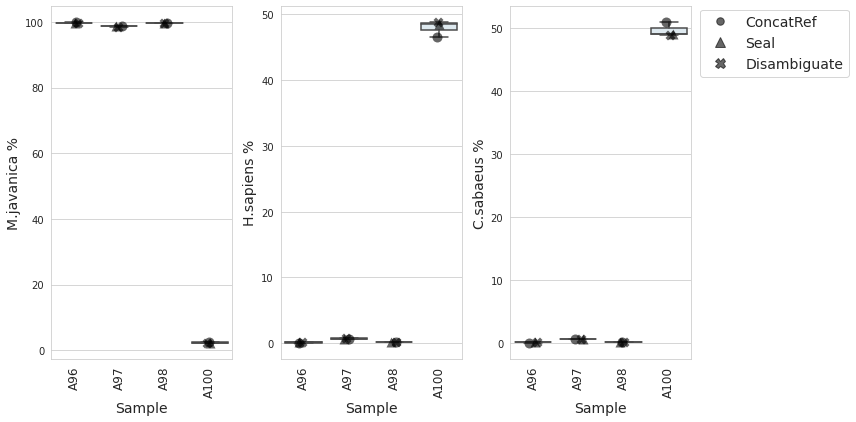

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

sns.set_palette("RdBu")
sns.set_style("whitegrid")

sns.boxplot(data=contigs_df, x='Sample', y='M.javanica %', ax=ax1)
chart=sns.stripplot(data=m_concat, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=m_seal, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, marker="^", ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=m_Disambiguate, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, marker="X", ax=ax1, s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('M.javanica %', fontdict={'size': 14})
labels1=ax1.get_xticklabels()
ax1.set_xticklabels(labels1, rotation=90, fontsize=12)
#ax1.set_yscale('log')

sns.boxplot(data=contigs_df, x='Sample', y='H.sapiens %', ax=ax2)
chart=sns.stripplot(data=m_concat, x='Sample', y='H.sapiens %', color="k", alpha=MARKER_ALPHA, ax=ax2, s=MARKER_SIZE)
chart=sns.stripplot(data=m_seal, x='Sample', y='H.sapiens %', color="k", alpha=MARKER_ALPHA, marker="^", ax=ax2, s=MARKER_SIZE)
chart=sns.stripplot(data=m_Disambiguate, x='Sample', y='H.sapiens %', color="k", alpha=MARKER_ALPHA, marker="X", ax=ax2, s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('H.sapiens %', fontdict={'size': 14})
labels2=ax2.get_xticklabels()
ax2.set_xticklabels(labels2, rotation=90, fontsize=12)

sns.boxplot(data=contigs_df, x='Sample', y='C.sabaeus %', ax=ax3)
chart=sns.stripplot(data=m_concat, x='Sample', y='C.sabaeus %', color="k", alpha=MARKER_ALPHA, ax=ax3, s=MARKER_SIZE)
chart=sns.stripplot(data=m_seal, x='Sample', y='C.sabaeus %', color="k", alpha=MARKER_ALPHA, marker="^", ax=ax3, s=MARKER_SIZE)
chart=sns.stripplot(data=m_Disambiguate, x='Sample', y='C.sabaeus %', color="k", alpha=MARKER_ALPHA, marker="X", ax=ax3, s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('C.sabaeus %', fontdict={'size': 14})
labels3=ax3.get_xticklabels()
ax3.set_xticklabels(labels3, rotation=90, fontsize=12)


plt_labels=['ConcatRef', 'Seal', 'Disambiguate']
handles, labels = ax3.get_legend_handles_labels()
dot = mlines.Line2D([], [], color='k', marker='.',
                          markersize=15, label='ConcatRef', alpha=MARKER_ALPHA, linewidth=0.001)
tri = mlines.Line2D([], [], color='k', marker='^',
                          markersize=10, label='Seal', alpha=MARKER_ALPHA, linewidth=0.001)
cross = mlines.Line2D([], [], color='k', marker='X',
                          markersize=10, label='Disambiguate', alpha=MARKER_ALPHA, linewidth=0.001)
ax3.legend(handles=[dot, tri, cross], loc=(1.05, 0.8), fontsize=14)


#plt.legend()
plt.tight_layout()
plt.savefig(BASE_PATH+'/general_plots/3_method_contigs_host_box_combined.png', dpi=300)
plt.show()